# Análisis exploratorio de datos con python

In [1]:
#Importación de nuestras librerías de trabajo

import os # Gestión de directorio
import pandas as pd # Manipulación de data frames
import numpy as np # Manipulación de Arrays
import matplotlib.pyplot as plt # Componente gráfico
import seaborn as sns # Componente gráfico

In [2]:
# Establecimiento de directorio de trabajo

os.getcwd() # Validamos que sea correcto
os.chdir('C:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Metodos_estadisticos') #Modificamos de ser necesario
os.listdir() # Revisamos los ficheros existentes

['.git', 'Data sets', 'Project GEIH 23', 'README.md']

In [4]:
gen_23 = pd.read_csv('Data sets\\gen_23.csv')

In [5]:
gen_23.head()

,Unnamed: 0,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038
0,1,7396102,1,1,1,4,1,683.772616,68,2,81,1,6,5.0,1.0,3.0,2.0,1.0
1,2,7396102,1,2,1,4,1,683.772616,68,2,48,1,6,6.0,1.0,5.0,2.0,1.0
2,3,7396103,1,1,1,4,1,1181.370048,68,1,36,1,6,2.0,1.0,3.0,2.0,2.0
3,4,7396103,1,2,1,4,1,1181.370048,68,2,39,2,6,2.0,1.0,5.0,2.0,1.0
4,5,7396103,1,3,1,4,1,1181.370048,68,1,11,2,6,6.0,1.0,4.0,2.0,NaN


In [6]:
gen_23.shape #dimensionalidad de mi df

(860802, 18)

In [7]:
gen_23.info() #Validamos datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   860802 non-null  int64  
 1   DIRECTORIO   860802 non-null  int64  
 2   SECUENCIA_P  860802 non-null  int64  
 3   ORDEN        860802 non-null  int64  
 4   HOGAR        860802 non-null  int64  
 5   MES          860802 non-null  int64  
 6   CLASE        860802 non-null  int64  
 7   FEX_C18      860802 non-null  float64
 8   DPTO         860802 non-null  int64  
 9   P3271        860802 non-null  int64  
 10  P6040        860802 non-null  int64  
 11  P2057        860802 non-null  int64  
 12  P6080        860802 non-null  int64  
 13  P6070        743034 non-null  float64
 14  P6160        831109 non-null  float64
 15  P3042        831109 non-null  float64
 16  P3042S1      831109 non-null  float64
 17  P3038        631485 non-null  float64
dtypes: float64(6), int64(12)

In [9]:
gen_23.columns # Columnas irrelevantes

Index(['Unnamed: 0', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'MES',
       'CLASE', 'FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070',
       'P6160', 'P3042', 'P3042S1', 'P3038'],
      dtype='object')

In [10]:
gen_23.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
# Creamos una primary key

gen_23['primary_key'] = gen_23['DIRECTORIO'].astype(str) + '-' + gen_23['SECUENCIA_P'].astype(str) + '-' + gen_23['ORDEN'].astype(str) + '-' + gen_23['HOGAR'].astype(str)

In [12]:
gen_23.columns

Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'MES', 'CLASE',
       'FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070', 'P6160',
       'P3042', 'P3042S1', 'P3038', 'primary_key'],
      dtype='object')

In [13]:
gen_23 = gen_23[['primary_key', 'MES', 'CLASE','FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070', 'P6160','P3042', 'P3042S1', 'P3038']]

In [14]:
gen_23.sample(5)

,primary_key,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038
802567,7544115-1-1-1,9,1,182.702284,86,1,33,2,6,6.0,1.0,10.0,9.0,2.0
48825,7415709-1-3-1,4,1,394.637762,54,2,19,2,6,6.0,1.0,5.0,2.0,1.0
818015,7550369-1-3-1,9,1,277.965508,63,1,20,2,6,6.0,1.0,5.0,2.0,2.0
376266,7487709-1-1-1,7,1,104.913975,15,1,70,2,6,3.0,1.0,11.0,2.0,2.0
40447,7412316-1-5-1,4,1,1844.839560,47,2,8,2,6,NaN,1.0,3.0,1.0,NaN


In [15]:
gen_23.columns = ['primary_key', 'MES', 'CLASE','FEX_C18', 'DPTO','SEXO','EDAD','CAMPESINO','CULTURA','EST_CIVIL','LEE','NIVEL_EDUC','EDUC','ATRACCIÓN']

In [16]:
gen_23['SEXO'] = gen_23['SEXO'].replace({1: 'Hombre',2: 'Mujer'}) 

In [18]:
# Crear diccionario de departamentos
diccionario_dpto = {
    5: 'Antioquia',
    8: 'Atlántico',
    11: 'Bogotá',
    13: 'Bolívar',
    15: 'Boyacá',
    17: 'Caldas',
    18: 'Caquetá',
    19: 'Cauca',
    20: 'Cesar',
    23: 'Córdoba',
    25: 'Cundinamarca',
    27: 'Chocó',
    41: 'Huila',
    44: 'La Guajira',
    47: 'Magdalena',
    50: 'Meta',
    52: 'Nariño',
    54: 'Norte de Santander',
    63: 'Quindio',
    66: 'Risaralda',
    68: 'Santander',
    70: 'Sucre',
    73: 'Tolima',
    76: 'Valle del Cauca'
}


In [19]:
gen_23['DPTO'] = gen_23['DPTO'].replace(diccionario_dpto)

In [20]:
diccionario_est_civ = {
    1: 'Pareja < 2',
    2: 'Pareja >= 2',
    3: 'Casado',
    4: 'Separado',
    5: 'Viudo',
    6: 'Soltero'
}


In [21]:
gen_23['EST_CIVIL'] = gen_23['EST_CIVIL'].replace(diccionario_est_civ)

In [22]:
diccionario_niv_educ = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Básica primaria',
    4: 'Básica secundaria',
    5: 'Media',
    6: 'Media técnica',
    7: 'Normalista',
    8: 'Técnica profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especialización',
    12: 'Maestría',
    13: 'Doctorado',
    99: 'No informa'
}

In [23]:
gen_23['NIVEL_EDUC'] = gen_23['NIVEL_EDUC'].replace(diccionario_niv_educ)

In [24]:
diccionario_meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

In [25]:
gen_23['MES'] = gen_23['MES'].replace(diccionario_meses)

In [26]:
diccionario_niveles_educativos = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Primaria',
    4: 'Secundaria',
    5: 'Media',
    6: 'Media técnica',
    7: 'Normalista',
    8: 'Técnica profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especialización',
    12: 'Maestría',
    13: 'Doctorado',
    99: 'No sabe, no informa'
}


In [27]:
gen_23['NIVEL_EDUC'] = gen_23['NIVEL_EDUC'].replace(diccionario_niveles_educativos)

In [28]:
gen_23.sample(5)

,primary_key,MES,CLASE,FEX_C18,DPTO,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,LEE,NIVEL_EDUC,EDUC,ATRACCIÓN
50961,7416620-1-3-1,abril,2,799.136150,Magdalena,Mujer,9,1,6,NaN,1.0,Básica primaria,4.0,NaN
7221,7398870-1-1-1,abril,1,615.991888,Atlántico,Hombre,55,2,6,Pareja >= 2,1.0,Tecnológica,6.0,2.0
78809,7512678-1-1-1,agosto,1,223.211044,Meta,Mujer,49,2,6,Separado,1.0,Media,2.0,1.0
420787,7505095-1-2-1,julio,1,297.183519,Cesar,Mujer,34,2,6,Pareja >= 2,1.0,Media,2.0,1.0
252053,7324281-1-1-1,enero,1,228.782206,Risaralda,Hombre,70,2,6,Viudo,1.0,Básica primaria,5.0,2.0


## Limpieza de datos

Generalmente los conjuntos de datos contienen mucho suciedad que suele dificultan su adecuado tratamiento y pueden llevarnos a conclusiones erradas. Es importante tratar esta situación a través de un proceso que llamamos limpieza o depuración de los datos. Entre estas situaciones comunes encontramos:

1. Datos faltantes o perdidos 
1. Columnas irrelevantes (que no responden al problema que queremos resolver)
1. Valores atípicos (*outliers*) o extremos (*extremes*)que requieren un tratamiento particular.   
1. Errores tipográficos 
1. Registros (filas) repetidos [redundancia de datos]

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [29]:
# Validemos datos vacios

gen_23.isna().sum()

primary_key         0
MES                 0
CLASE               0
FEX_C18             0
DPTO                0
SEXO                0
EDAD                0
CAMPESINO           0
CULTURA             0
EST_CIVIL      117768
LEE             29693
NIVEL_EDUC      29693
EDUC            29693
ATRACCIÓN      229317
dtype: int64

In [30]:
#Eliminaré atracción, no me representa mayor interés y tiene muchos datos perdidos
gen_23.drop('ATRACCIÓN',axis=1,inplace=True)

In [31]:
gen_23.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   primary_key  860802 non-null  object 
 1   MES          860802 non-null  object 
 2   CLASE        860802 non-null  int64  
 3   FEX_C18      860802 non-null  float64
 4   DPTO         860802 non-null  object 
 5   SEXO         860802 non-null  object 
 6   EDAD         860802 non-null  int64  
 7   CAMPESINO    860802 non-null  int64  
 8   CULTURA      860802 non-null  int64  
 9   EST_CIVIL    743034 non-null  object 
 10  LEE          831109 non-null  float64
 11  NIVEL_EDUC   831109 non-null  object 
 12  EDUC         831109 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 85.4+ MB


In [32]:
gen_23.isna().sum()

primary_key         0
MES                 0
CLASE               0
FEX_C18             0
DPTO                0
SEXO                0
EDAD                0
CAMPESINO           0
CULTURA             0
EST_CIVIL      117768
LEE             29693
NIVEL_EDUC      29693
EDUC            29693
dtype: int64

El tratamiento de datos faltantes puede hacerse por dos vías

1. Eliminación cuando el costo de oportunidad es tolerable
1. Emplear **técnicas de imputación** cuando esto es posibles

Tomar esta decisión requiere un análisis cuidadoso de la situación.

C:\Users\Julian\AppData\Local\Temp\ipykernel_24612\2248889329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gen_23,x='MES',palette='Set3')


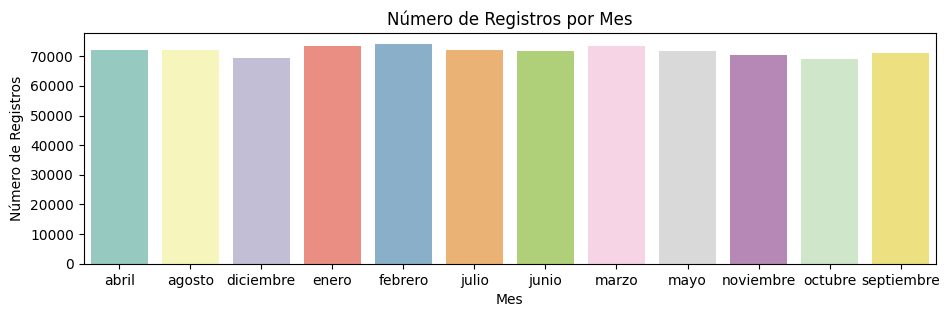

In [35]:
# Cómo se distribuyen esos datos faltantes

#Veamos primero la información por mes
plt.figure(figsize=(11, 3))
sns.countplot(data=gen_23,x='MES',palette='Set3')
# Agregar etiquetas y título al gráfico
plt.xlabel('Mes')
plt.ylabel('Número de Registros')
plt.title('Número de Registros por Mes')

# Mostrar el gráfico
plt.show()

In [36]:
# Creo una columna booleana indicando si hay datos faltantes en cualquier lugar del DataFrame

gen_23['faltantes'] = gen_23.isna().any(axis=1) 

In [40]:
# Calcular el total de datos faltantes por mes
faltantes = gen_23.groupby('MES')['faltantes'].sum()
faltantes

MES
abril          9970
agosto         9775
diciembre      9375
enero         10251
febrero       10212
julio          9722
junio         10161
marzo         10066
mayo           9785
noviembre      9516
octubre        9311
septiembre     9624
Name: faltantes, dtype: int64

C:\Users\Julian\AppData\Local\Temp\ipykernel_24612\2628469260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=faltantes.values,x=faltantes.index,palette='Set3')


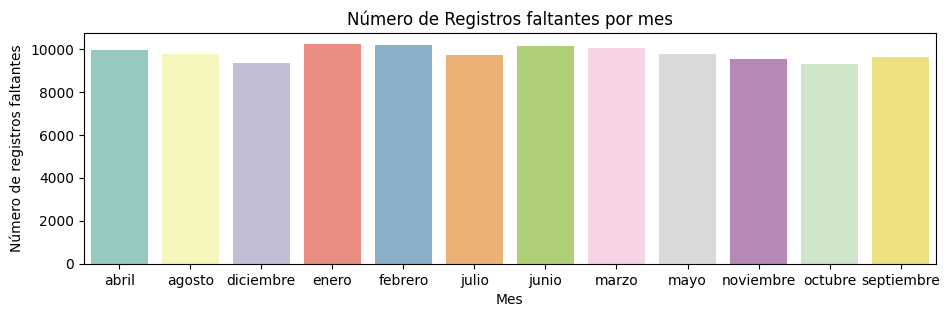

In [41]:
# Cómo se distribuyen esos datos faltantes

#Veamos primero la información por mes
plt.figure(figsize=(11, 3))
sns.barplot(y=faltantes.values,x=faltantes.index,palette='Set3')
# Agregar etiquetas y título al gráfico
plt.xlabel('Mes')
plt.ylabel('Número de registros faltantes')
plt.title('Número de Registros faltantes por mes')

# Mostrar el gráfico
plt.show()

### **Nota**
No es un problema con algún mes en particular. Dado el interés particular de mi investigación procederé sólo a eliminar los datos faltantes en la variable EDUC.

In [42]:
gen_23.dropna(subset=['EDUC'],inplace=True)

In [45]:
gen_23.isna().sum()

primary_key        0
MES                0
CLASE              0
FEX_C18            0
DPTO               0
SEXO               0
EDAD               0
CAMPESINO          0
CULTURA            0
EST_CIVIL      88075
LEE                0
NIVEL_EDUC         0
EDUC               0
faltantes          0
dtype: int64

### *Outliers* en las variables numéricas

Los boxplot son la herramienta predilecta para la valoración de outliers

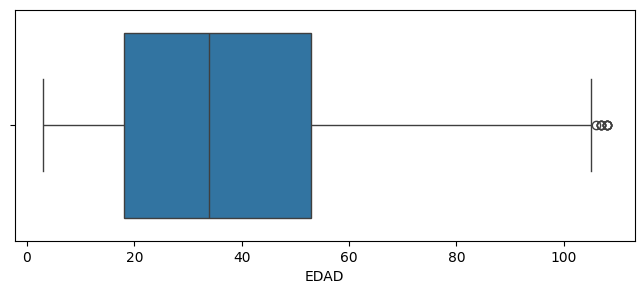

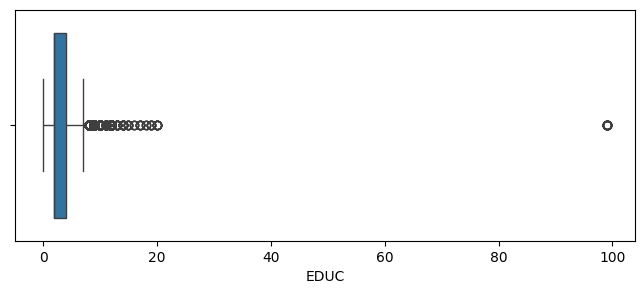

In [65]:
cols_num = ['EDAD','EDUC']

for i in cols_num:
    plt.subplots(ncols=1, figsize=(8,3))
    sns.boxplot(data= gen_23,x=i)


In [73]:
# Veamos que está pasando en edad

print(max(gen_23.EDAD), 'Edad máxima') # 108 años
print(len(gen_23[gen_23.EDAD >= 100]), 'Número de encuestados con mas de 100 años')


108 Edad máxima
147 Número de encuestados con mas de 100 años


In [75]:
# Veamos que está pasando en educación

print(max(gen_23.EDUC), 'Educación máxima') # 99 años

99.0 Educación máxima


In [80]:
gen_23[gen_23.EDUC == 99]['NIVEL_EDUC'].value_counts()

# Eliminamos los 

NIVEL_EDUC
No informa    25
Name: count, dtype: int64

In [84]:
gen_23.drop(gen_23[gen_23['EDUC'] == 99].index,inplace=True)

In [86]:
print(max(gen_23.EDUC), 'Educación máxima') #Ahora los datos si parecen tener sentido

20.0 Educación máxima


# Exploración de variables cualitativas


In [87]:
freq = gen_23.SEXO.value_counts(normalize= True)
etiquetas = freq.index

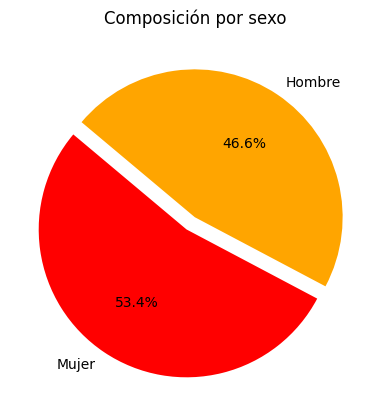

In [88]:
plt.pie(freq,labels=etiquetas,autopct='%1.1f%%', startangle=140,colors= ['red','orange'],explode = (0.1, 0) )
plt.title('Composición por sexo')
plt.show()

In [89]:
gen_23.DPTO.value_counts() #Acá tengo un problema a resolver

DPTO
Antioquia             49084
Valle del Cauca       43179
Santander             39996
Caldas                38753
Bolívar               37871
Atlántico             37442
Risaralda             36189
Nariño                35630
Magdalena             35352
Norte de Santander    33197
Sucre                 33040
Meta                  32401
La Guajira            31920
Chocó                 31483
Cesar                 30433
Cauca                 30329
Quindio               30178
Huila                 28564
Boyacá                27721
Caquetá               27585
Córdoba               27565
Tolima                27541
Bogotá                25662
Cundinamarca          15532
88                     8994
81                     5206
97                     4933
85                     4932
91                     4398
94                     4371
95                     4247
86                     3915
99                     3441
Name: count, dtype: int64

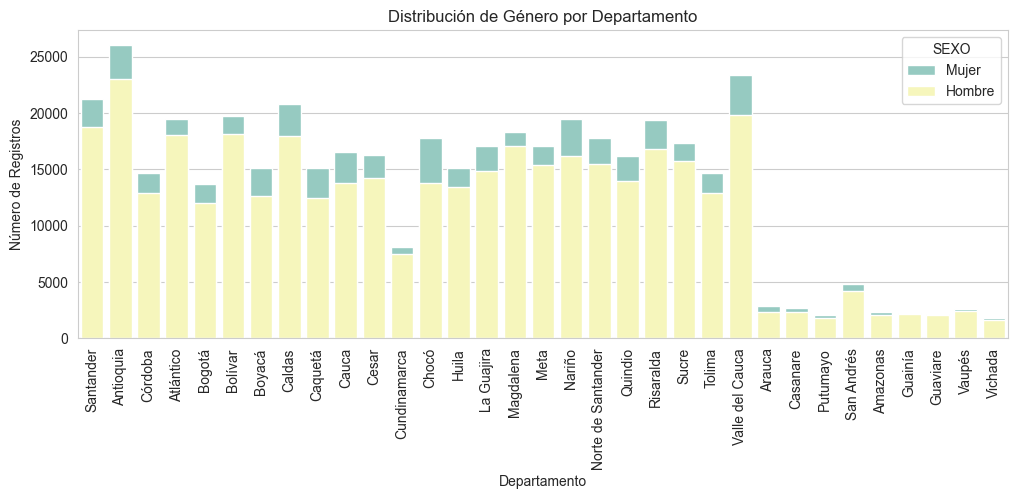

In [99]:
# Gráficos para cruzar variables cualitativas

sns.set_style("whitegrid") #Establezco estilo gráfico
#"darkgrid","whitegrid","dark","white","ticks"

plt.figure(figsize=(12, 4))
sns.countplot(x='DPTO', hue='SEXO', data=gen_23, palette='Set3',dodge=False)

# Agregar etiquetas y título al gráfico
plt.xlabel('Departamento')
plt.ylabel('Número de Registros')
plt.title('Distribución de Género por Departamento')
plt.xticks(rotation='vertical')

# Mostrar el gráfico
plt.show()

In [93]:
len(gen_23.DPTO.value_counts()) # 33 departamentos
gen_23.DPTO.value_counts().index
#gen_23.DPTO.value_counts()[24:]

Index([         'Antioquia',    'Valle del Cauca',          'Santander',
                   'Caldas',            'Bolívar',          'Atlántico',
                'Risaralda',             'Nariño',          'Magdalena',
       'Norte de Santander',              'Sucre',               'Meta',
               'La Guajira',              'Chocó',              'Cesar',
                    'Cauca',            'Quindio',              'Huila',
                   'Boyacá',            'Caquetá',            'Córdoba',
                   'Tolima',             'Bogotá',       'Cundinamarca',
                         88,                   81,                   97,
                         85,                   91,                   94,
                         95,                   86,                   99],
      dtype='object', name='DPTO')

In [94]:
departamentos_2 = {
    88: 'San Andrés',
    81: 'Arauca',
    97: 'Vaupés',
    85: 'Casanare',
    91: 'Amazonas',
    94: 'Guainía',
    95: 'Guaviare',
    86: 'Putumayo',
    99: 'Vichada'    
}

In [96]:
gen_23.DPTO.replace(departamentos_2, inplace=True)


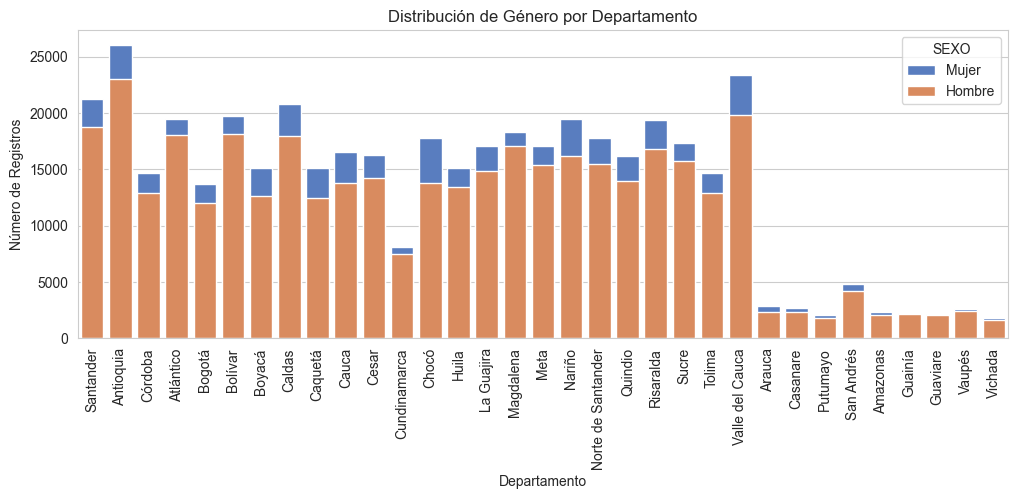

In [102]:
# Gráficos para cruzar variables cualitativas con variables dpto categorizadas

plt.figure(figsize=(12, 4))
sns.countplot(x='DPTO', hue='SEXO', data=gen_23, palette='muted',dodge=False)

# Agregar etiquetas y título al gráfico
plt.xlabel('Departamento')
plt.ylabel('Número de Registros')
plt.title('Distribución de Género por Departamento')
plt.xticks(rotation='vertical')

# Mostrar el gráfico
plt.show()

In [111]:
#Si quisiera eliminar esos registros

# Lista de valores a eliminar
#valores_a_eliminar = [88, 81, 97, 85, 94, 91, 95, 86, 99]
# Filtrar las filas que NO tienen los valores a eliminar en la columna 'DPTO'
#df_filtrado = gen_23[~gen_23['DPTO'].isin(valores_a_eliminar)]

C:\Users\Julian\AppData\Local\Temp\ipykernel_24612\2912119091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NIVEL_EDUC', data=gen_23, palette='Set3')


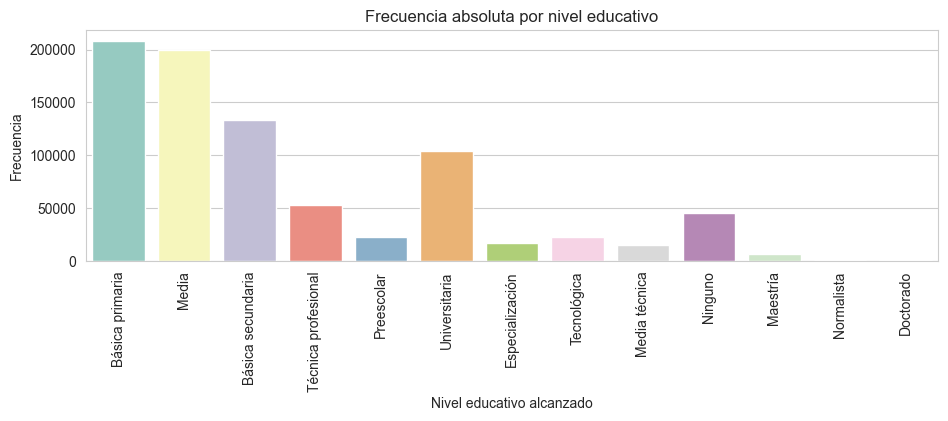

In [103]:
# Cómo se comporta el nivel de estudios en el país

#Veamos primero la información por mes
plt.figure(figsize=(11, 3))

sns.countplot(x='NIVEL_EDUC', data=gen_23, palette='Set3')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()


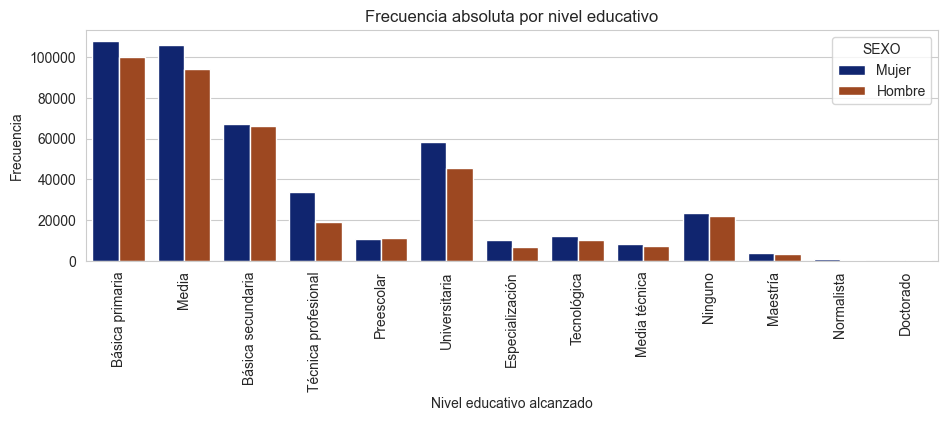

In [105]:
plt.figure(figsize=(11, 3))

sns.countplot(x='NIVEL_EDUC', data=gen_23, palette='dark',hue='SEXO')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()

In [136]:
# Usando operadores lógicos para el análisis 

len(gen_23[(gen_23['SEXO'] == 'Hombre') & (gen_23['NIVEL_EDUC'] == 'Universitaria')])

45739

In [106]:
pd.crosstab(gen_23.NIVEL_EDUC,gen_23.SEXO,normalize='index',margins=True,margins_name='Total')* 100

SEXO,Hombre,Mujer
NIVEL_EDUC,,
Básica primaria,48.155468,51.844532
Básica secundaria,49.645932,50.354068
Doctorado,58.714597,41.285403
Especialización,41.159016,58.840984
Maestría,46.851774,53.148226
Media,46.989205,53.010795
Media técnica,46.769590,53.230410
Ninguno,48.383357,51.616643
Normalista,22.152341,77.847659


In [107]:
pd.crosstab(gen_23.NIVEL_EDUC,gen_23.SEXO,normalize='columns',margins=True,margins_name='Total')* 100

SEXO,Hombre,Mujer,Total
NIVEL_EDUC,,,
Básica primaria,25.839453,24.310388,25.023463
Básica secundaria,17.094026,15.151180,16.057222
Doctorado,0.139070,0.085455,0.110458
Especialización,1.825200,2.280219,2.068022
Maestría,0.862029,0.854547,0.858036
Media,24.247499,23.904760,24.064595
Media técnica,1.860290,1.850240,1.854927
Ninguno,5.706523,5.320060,5.500286
Normalista,0.081791,0.251178,0.172185


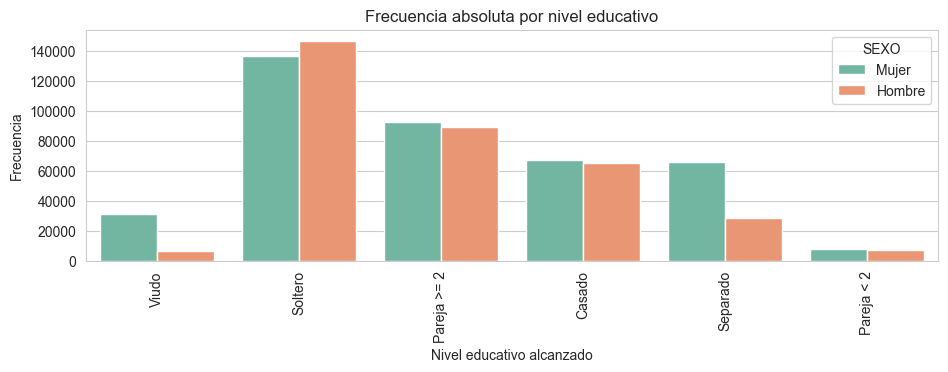

In [108]:
# Por estado civil

plt.figure(figsize=(11, 3))

sns.countplot(x='EST_CIVIL', data=gen_23, palette='Set2',hue='SEXO')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()

# Exploración variables cuantitativas

In [110]:
gen_23.describe().round(2)

,CLASE,FEX_C18,EDAD,CAMPESINO,CULTURA,LEE,EDUC
count,831084.00,831084.00,831084.00,831084.00,831084.00,831084.00,831084.00
mean,1.13,709.97,36.16,1.72,5.70,1.09,3.15
std,0.33,1017.34,21.42,0.60,1.02,0.28,2.62
min,1.00,7.82,3.00,1.00,1.00,1.00,0.00
25%,1.00,149.59,18.00,1.00,6.00,1.00,2.00
50%,1.00,301.16,34.00,2.00,6.00,1.00,2.00
75%,1.00,846.14,53.00,2.00,6.00,1.00,4.00
max,2.00,14859.25,108.00,9.00,6.00,2.00,20.00


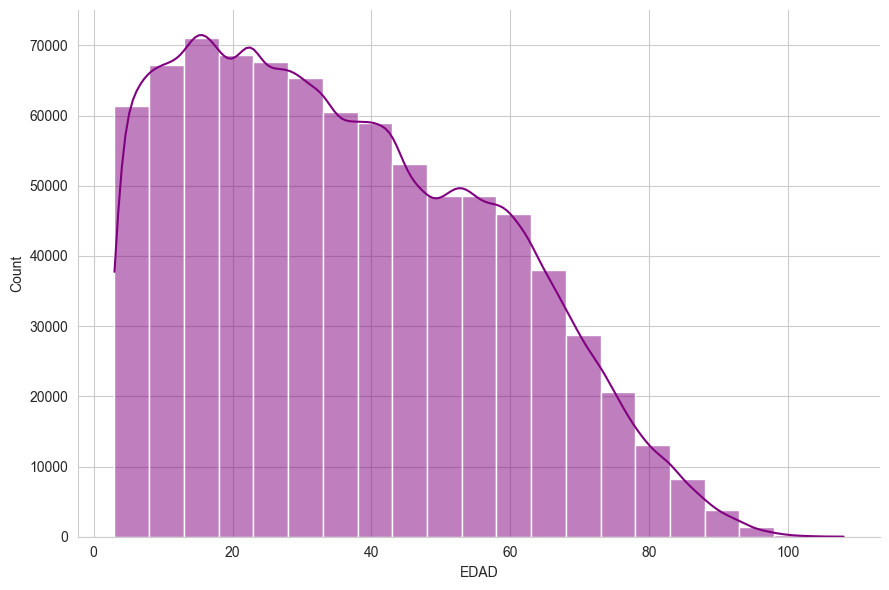

In [111]:
sns.displot(data=gen_23,x = 'EDAD',kde= True, color = 'purple', bins = 'sturges', height=6, aspect=1.5)
plt.show()

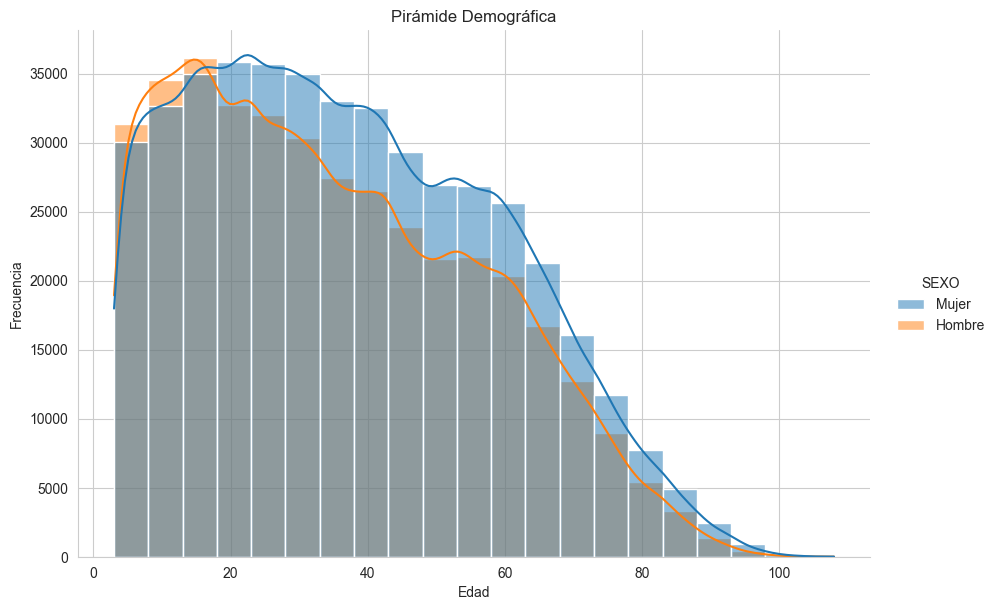

In [112]:
# Veamoslo segmentado por sexo

sns.displot(data=gen_23, x='EDAD', kde=True, color='purple', bins='sturges', hue='SEXO', height=6, aspect=1.5)

plt.title('Pirámide Demográfica')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()


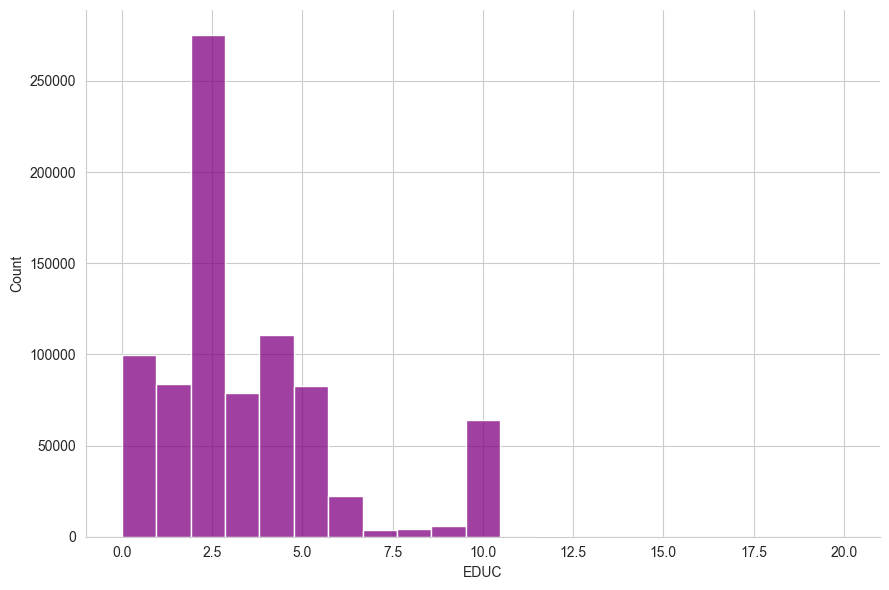

In [116]:
sns.displot(data=gen_23,x = 'EDUC',color = 'purple', bins = 'sturges', height=6, aspect=1.5)
plt.show()

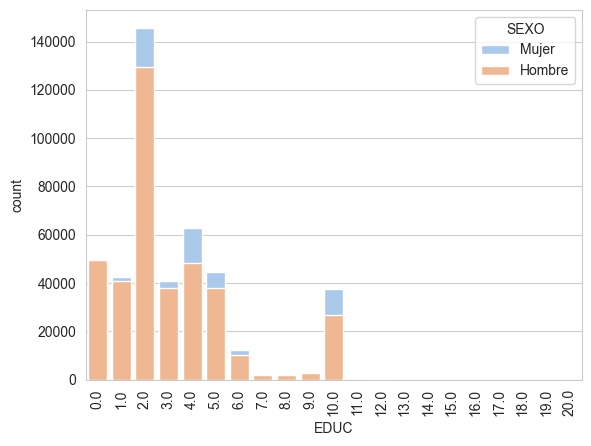

In [123]:
sns.countplot(data=gen_23,x='EDUC',color = 'purple',palette= 'pastel',hue='SEXO', dodge=False)
plt.xticks(rotation = 'vertical')
plt.show()

In [126]:
pd.crosstab(gen_23.EDUC,gen_23.NIVEL_EDUC)

NIVEL_EDUC,Básica primaria,Básica secundaria,Doctorado,Especialización,Maestría,Media,Media técnica,Ninguno,Normalista,Preescolar,Tecnológica,Técnica profesional,Universitaria
EDUC,,,,,,,,,,,,,
0.0,11780,12206,17,175,81,5733,436,45712,14,20009,364,966,2001
1.0,20239,30643,42,902,288,19952,1339,0,70,2332,812,2548,4344
2.0,33207,32567,52,11810,306,174312,13641,0,62,0,881,4073,4269
3.0,37217,32063,37,541,424,0,0,0,34,0,768,3458,4061
4.0,29363,25970,39,3130,5350,0,0,0,667,0,2149,40055,4153
5.0,76160,0,46,223,145,0,0,0,584,0,1010,898,3645
6.0,0,0,447,308,484,0,0,0,0,0,16376,801,3871
7.0,0,0,15,5,12,0,0,0,0,0,6,5,3582
8.0,0,0,122,93,41,0,0,0,0,0,2,5,4168


C:\Users\Julian\AppData\Local\Temp\ipykernel_24612\3774574894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gen_23, x='SEXO',y='EDUC',palette="Set2")


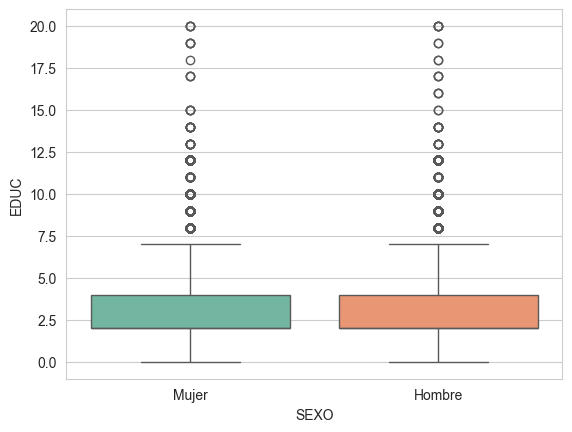

In [125]:
sns.boxplot(data=gen_23, x='SEXO',y='EDUC',palette="Set2")
plt.show()